<a href="https://colab.research.google.com/github/sweetcide/Machine_Learning/blob/main/04_%EB%B6%84%EB%A5%98_DTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DecisionTreeClassifer

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=156)


# 붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 1)


# DTC 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [6]:
from sklearn.tree import export_graphviz

# export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled=True) 

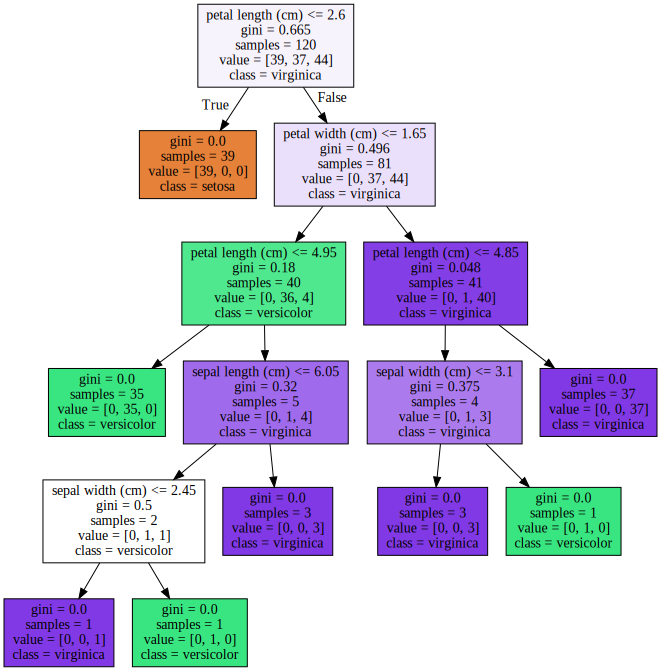

In [7]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:  [0.008 0.031 0.572 0.389]
sepal length (cm) : 0.008
sepal width (cm) : 0.031
petal length (cm) : 0.572
petal width (cm) : 0.389


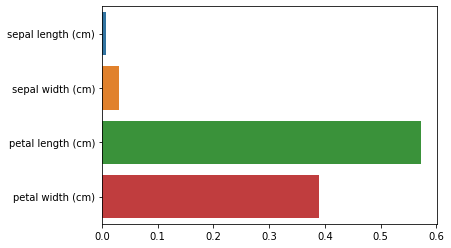

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance
print('Feature importances: ',np.round(dt_clf.feature_importances_,3))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importnace를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

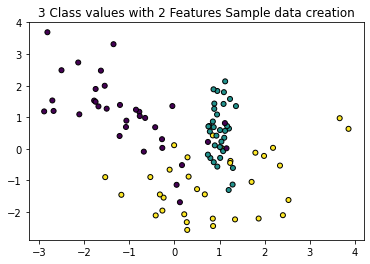

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant=0 , n_informative=2, n_classes = 3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

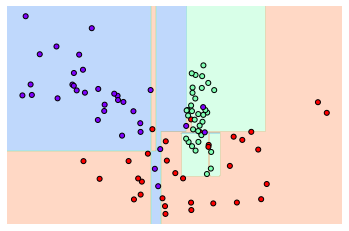

In [11]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

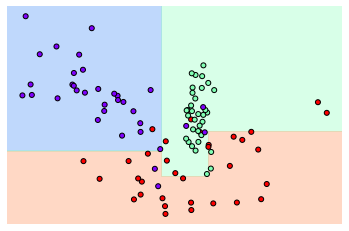

In [12]:
# 특정한 트리 생성 6개 제약결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# UCI 데이터 실습

In [13]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

# feature.txt파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음, 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
print(feature_name_df)
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

     column_index                           column_name
0               1                     tBodyAcc-mean()-X
1               2                     tBodyAcc-mean()-Y
2               3                     tBodyAcc-mean()-Z
3               4                      tBodyAcc-std()-X
4               5                      tBodyAcc-std()-Y
..            ...                                   ...
556           557      angle(tBodyGyroMean,gravityMean)
557           558  angle(tBodyGyroJerkMean,gravityMean)
558           559                  angle(X,gravityMean)
559           560                  angle(Y,gravityMean)
560           561                  angle(Z,gravityMean)

[561 rows x 2 columns]
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [14]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [15]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                              if x[1]>0 else x[0], axis = 1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [16]:
def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
  
  #중복된 피처 명을 수정하는 get_new_feature_name_df(feature_name_df)
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피쳐 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/train/X_train.txt',sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/test/X_test.txt',sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/train/y_train.txt',sep='\s+', names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/파이썬/ML/data/test/y_test.txt',sep='\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [18]:
'action' in y_train.columns

True

In [19]:
print(y_train.columns)

Index(['action'], dtype='object')


In [20]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: ', accuracy)

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier의 기본 하이퍼 파라미터: ', dt_clf.get_params())

결정 트리 예측 정확도:  0.8642687478791992
DecisionTreeClassifier의 기본 하이퍼 파라미터:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}


In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: ', grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파리미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:  0.8525653796528807
GridSearchCV 최적 하이퍼 파리미터:  {'max_depth': 8}


In [23]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.843444
1,8,0.852565
2,10,0.843727
3,12,0.840325
4,16,0.839374
5,20,0.838150
6,24,0.836926


In [24]:
max_depth = [6, 8, 10, 12, 16, 20, 24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf = DecisionTreeClassifier(max_depth = depth, random_state= 156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.855786
max_depth = 8 정확도: 0.870716
max_depth = 10 정확도: 0.867323
max_depth = 12 정확도: 0.864608
max_depth = 16 정확도: 0.857482
max_depth = 20 정확도: 0.854768
max_depth = 24 정확도: 0.854768


In [25]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
  
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: ',grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치:  0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [26]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: ', accuracy)

결정 트리 예측 정확도:  0.8717339667458432


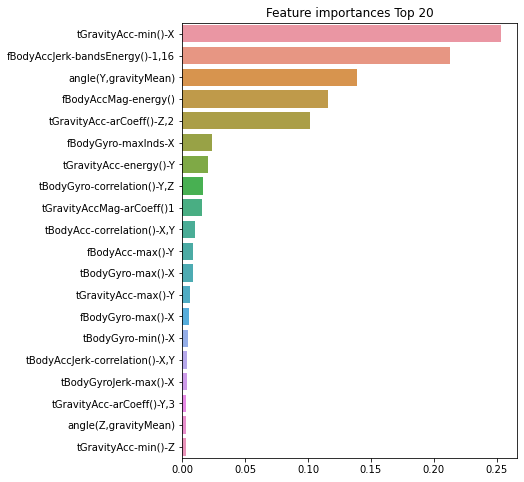

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(6,8))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [30]:
# 결정 트리에서 사용한 get_human_dataset()를 이용하여 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트 정확도', accuracy)

랜덤포레스트 정확도 0.9253478113335596


In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# RandomForestClassfier 객체 생성 후 GridSearchCV 진행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터\n', grid_cv.best_params_)
print('최고 예측 정확도: ',grid_cv.best_score_)

최적 하이퍼 파라미터
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:  0.9179815016322089


In [38]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth = 10, min_samples_leaf=8, min_samples_split=8, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: ',accuracy_score(y_test, pred))

예측 정확도:  0.9165252799457075


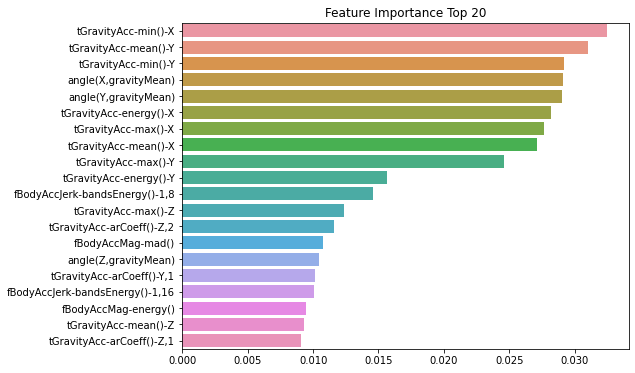

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values (ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [ ]:
ㄴㄴ

#GBM

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = (y_test, gb_pred)

print('GBM 정확도: ',gb_accuracy)
print('GBM 수행 시간: ',time.time()-start_time)


GBM 정확도:  (      action
0          5
1          5
2          5
3          5
4          5
...      ...
2942       2
2943       2
2944       2
2945       2
2946       2

[2947 rows x 1 columns], array([5, 5, 5, ..., 2, 2, 2]))
GBM 수행 시간:  805.7480471134186


In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train ,y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

#XGBoost

##python

In [67]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data = X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(2)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [68]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 0)

In [70]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [71]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [72]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metrics':'log_loss',
          'early_stoppings':100
          }
num_rounds = 400

In [ ]:
# train 세트의 data는 'train' test 세트의 data는 'eval'로 명명
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파리미터와 earl stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

In [75]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#0.5보다 작으면 0 크면 1로 예측값을 결정해 list 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.001 0.988 0.999 0.998 0.999 1.    0.999 0.998 0.995 1.   ]
예측값 10개만 표시: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds)

오차 행렬
[[45  2]
 [ 1 66]]
정확도: 0.9737, 정밀도: 0.9706, 재현율: 0.9851,    F1: 0.9778, AUC:0.9713


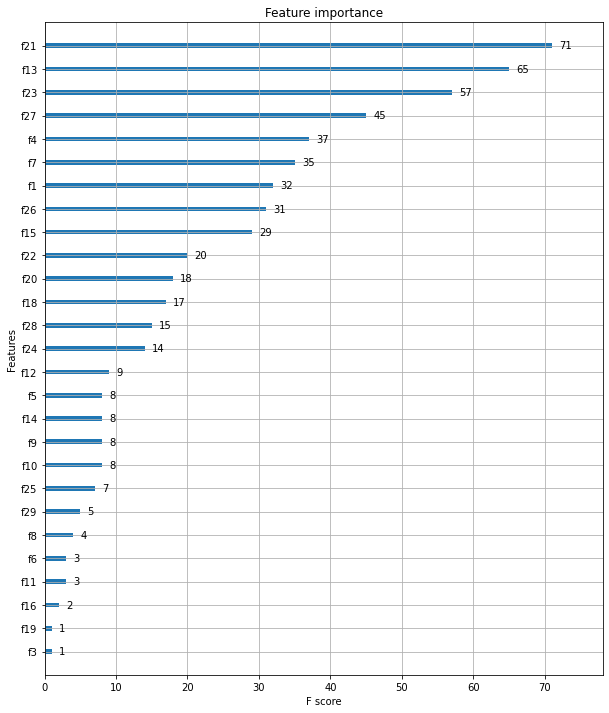

In [85]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize =(10,12))
plot_importance(xgb_model, ax=ax)

## scikit

In [86]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators= 400, learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,-1]

In [87]:
get_clf_eval(y_test, w_preds)

오차 행렬
[[46  1]
 [ 0 67]]
정확도: 0.9912, 정밀도: 0.9853, 재현율: 1.0000,    F1: 0.9926, AUC:0.9894


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators= 400, learning_rate=0.1,max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,-1]

In [94]:
get_clf_eval(y_test, ws100_preds)

오차 행렬
[[46  1]
 [ 0 67]]
정확도: 0.9912, 정밀도: 0.9853, 재현율: 1.0000,    F1: 0.9926, AUC:0.9894


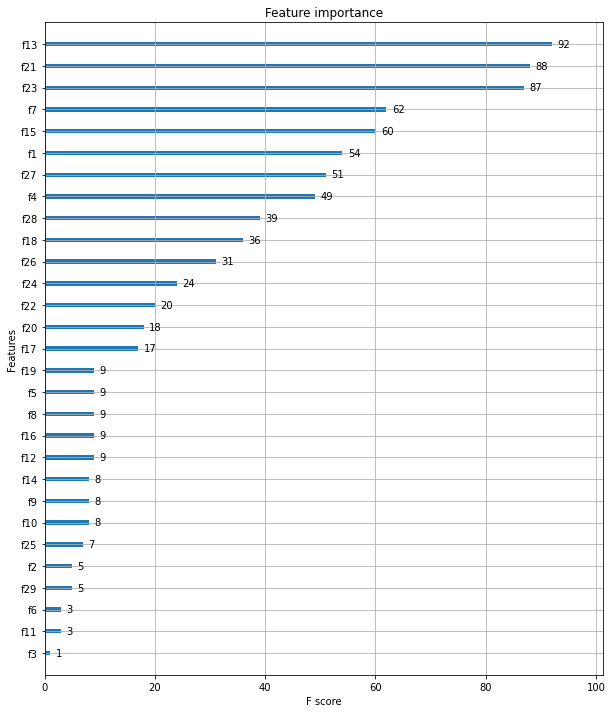

In [96]:
fig, ax= plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)